In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

In [17]:
# Load the California Housing Dataset
data = fetch_california_housing()
house_price_dataframe = pd.DataFrame(data.data, columns=data.feature_names)

In [21]:
# Add the target variable (house prices)
house_price_dataframe['price'] = data.target

In [20]:
# Display the first few rows of the dataset
print(house_price_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  price
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


In [22]:
# Dataset information
print("Shape of the dataset:", house_price_dataframe.shape)

Shape of the dataset: (20640, 9)


In [23]:
# Check for missing values
print("Missing values in the dataset:", house_price_dataframe.isnull().sum())

Missing values in the dataset: MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [24]:
# Statistical summary
print(house_price_dataframe.describe())

             MedInc      HouseAge      AveRooms  ...      Latitude     Longitude         price
count  20640.000000  20640.000000  20640.000000  ...  20640.000000  20640.000000  20640.000000
mean       3.870671     28.639486      5.429000  ...     35.631861   -119.569704      2.068558
std        1.899822     12.585558      2.474173  ...      2.135952      2.003532      1.153956
min        0.499900      1.000000      0.846154  ...     32.540000   -124.350000      0.149990
25%        2.563400     18.000000      4.440716  ...     33.930000   -121.800000      1.196000
50%        3.534800     29.000000      5.229129  ...     34.260000   -118.490000      1.797000
75%        4.743250     37.000000      6.052381  ...     37.710000   -118.010000      2.647250
max       15.000100     52.000000    141.909091  ...     41.950000   -114.310000      5.000010

[8 rows x 9 columns]


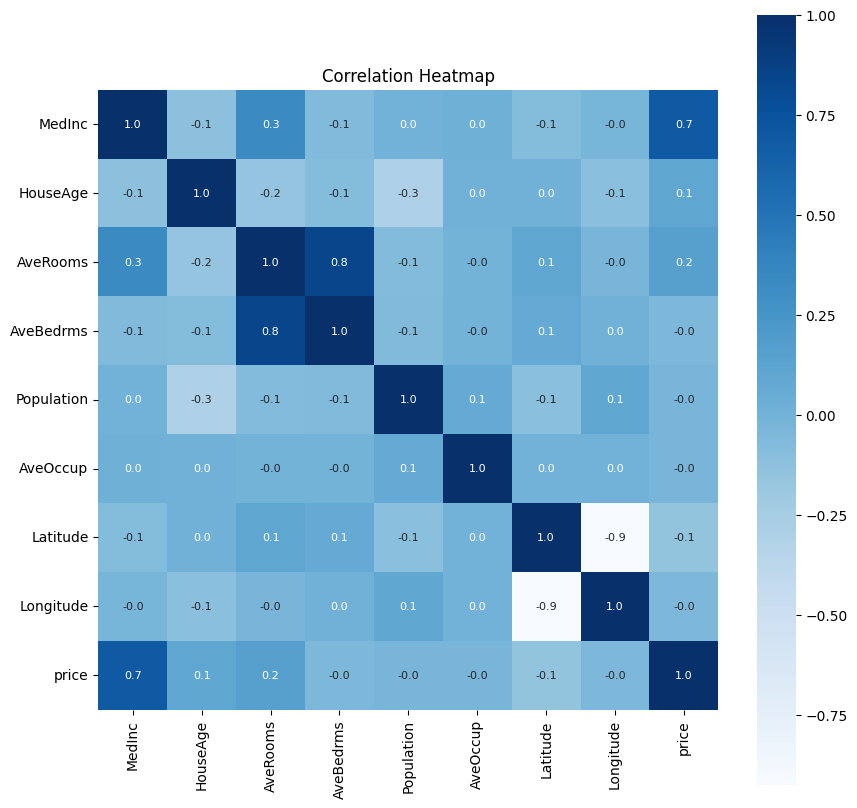

In [25]:

# Correlation heatmap
plt.figure(figsize=(10, 10))
correlation = house_price_dataframe.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Splitting data into features (X) and target (Y)
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [27]:
# Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
# Display the shapes of the datasets
print("Dataset shapes:")
print("X:", X.shape)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Dataset shapes:
X: (20640, 8)
X_train: (16512, 8)
X_test: (4128, 8)


In [29]:
# Initializing the XGBoost Regressor
model = XGBRegressor()

In [30]:
# Training the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
# Model predictions on the training data
training_data_prediction = model.predict(X_train)

In [32]:
# Evaluation metrics on the training data
train_r2 = metrics.r2_score(Y_train, training_data_prediction)
train_mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Training R squared error:", train_r2)
print("Training Mean Absolute Error:", train_mae)

Training R squared error: 0.943650140819218
Training Mean Absolute Error: 0.1933648700612105


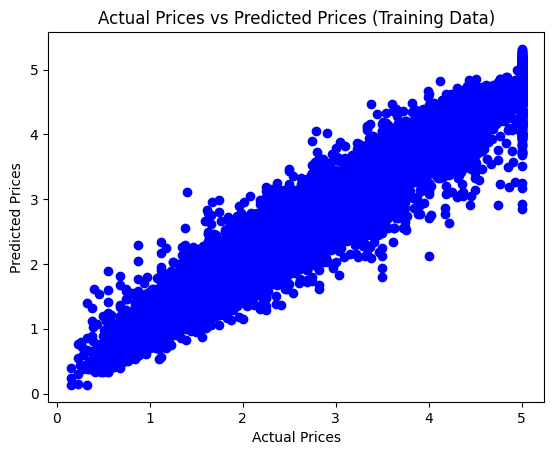

In [33]:
# Scatter plot of Actual vs Predicted prices (Training Data)
plt.scatter(Y_train, training_data_prediction, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Training Data)")
plt.show()

In [34]:
# Predictions on test data
test_data_prediction = model.predict(X_test)

In [35]:
# Evaluation metrics on the test data
test_r2 = metrics.r2_score(Y_test, test_data_prediction)
test_mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Test R squared error:", test_r2)
print("Test Mean Absolute Error:", test_mae)

Test R squared error: 0.8338000331788725
Test Mean Absolute Error: 0.3108631800268186


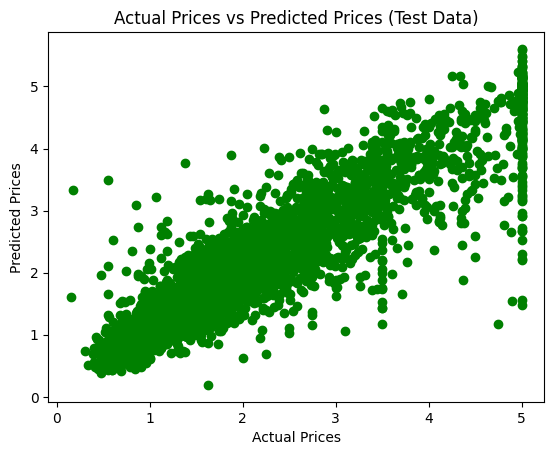

In [36]:
# Scatter plot of Actual vs Predicted prices (Test Data)
plt.scatter(Y_test, test_data_prediction, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Test Data)")
plt.show()